In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Mall_Customers.csv")

In [5]:
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
print(df.describe())

       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000               73.000000
max    200.000000   70.000000          137.000000               99.000000


In [7]:
print(df.dtypes)

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object


In [8]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [9]:
plt.style.use('fivethirtyeight')

C:\Users\manojkumar\AppData\Local\Temp\ipykernel_11028\3916672652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])
C:\Users\manojkumar\AppData\Local\Temp\ipykernel_11028\3916672652.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])
C:\Users\manojkumar\App

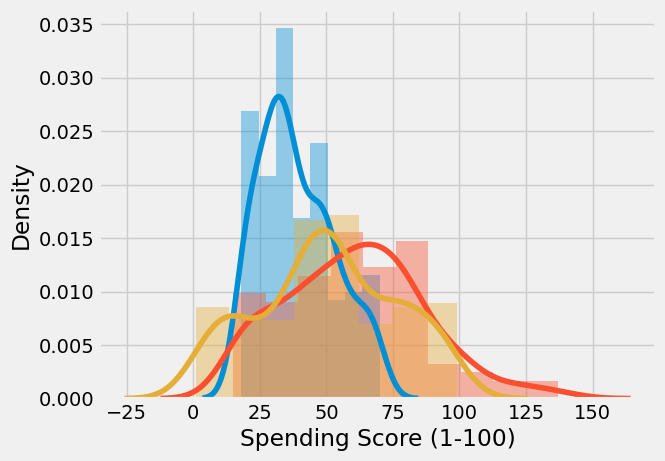

In [10]:
sns.distplot(df["Age"])
sns.distplot(df["Annual Income (k$)"])
sns.distplot(df["Spending Score (1-100)"])
plt.show()

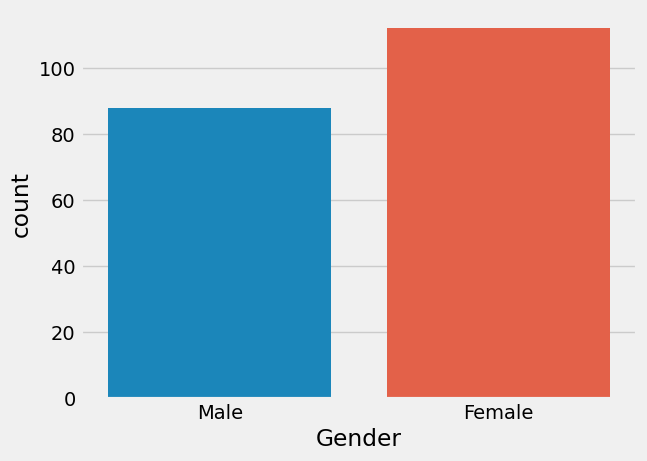

In [12]:
sns.countplot(data=df, x="Gender")
plt.show()

C:\Users\manojkumar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


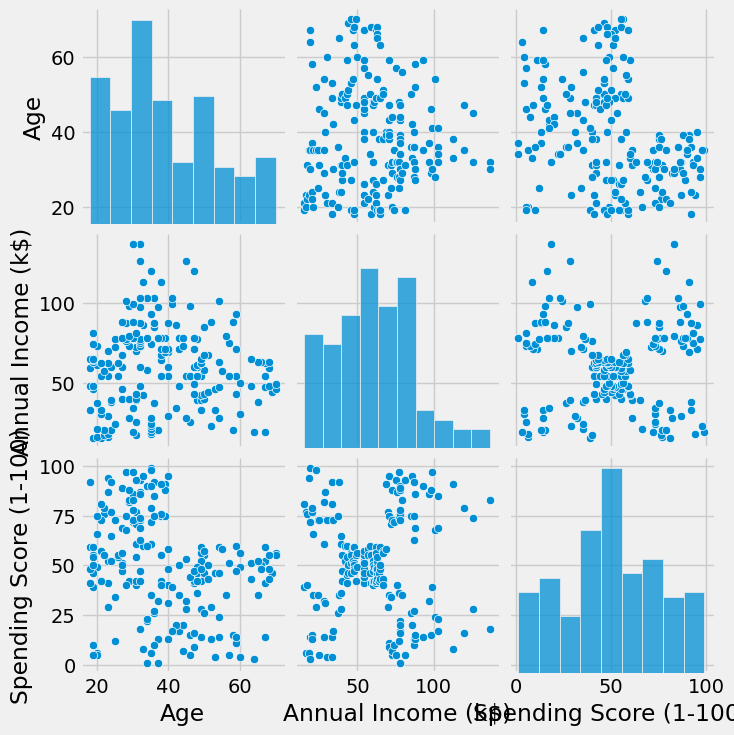

In [13]:
sns.pairplot(df[["Age", "Annual Income (k$)", "Spending Score (1-100)"]])
plt.show()

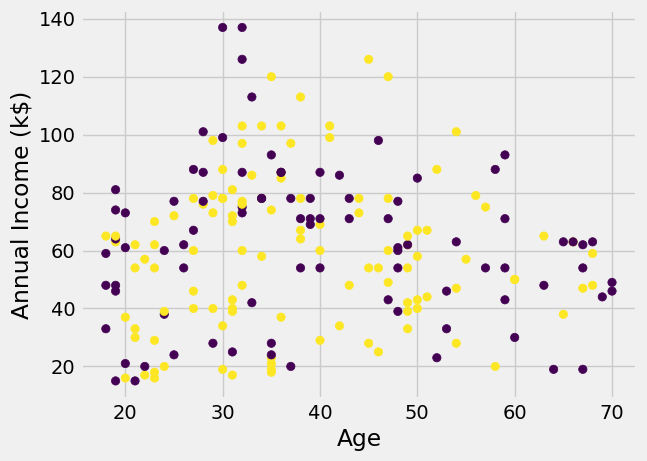

In [14]:
plt.scatter(df["Age"], df["Annual Income (k$)"], c=df["Gender"].map({"Male": 0, "Female": 1}))
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()

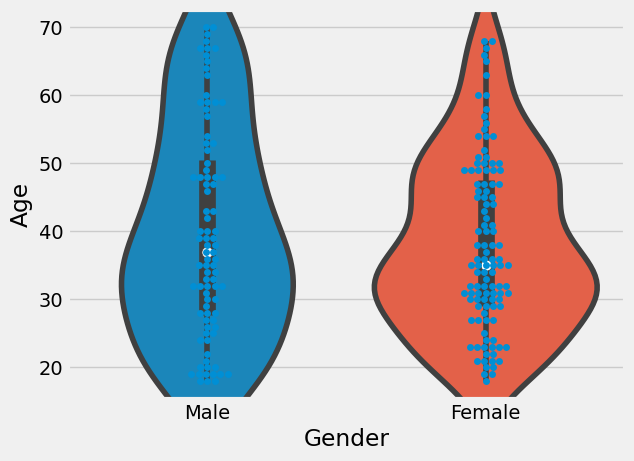

In [15]:
sns.violinplot(x="Gender", y="Age", data=df)
sns.swarmplot(x="Gender", y="Age", data=df)
plt.show()

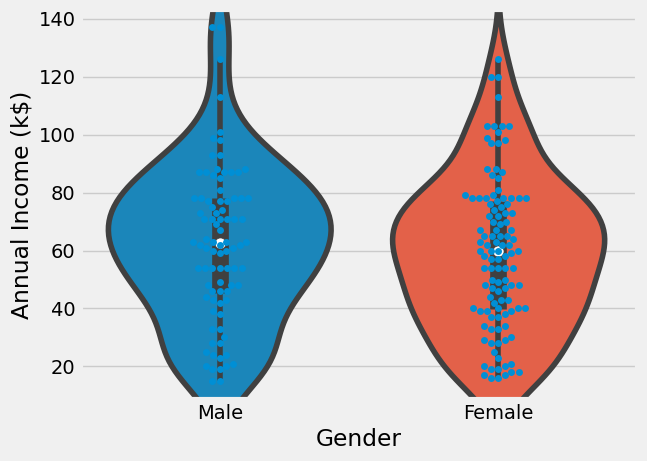

In [16]:
sns.violinplot(x="Gender", y="Annual Income (k$)", data=df)
sns.swarmplot(x="Gender", y="Annual Income (k$)", data=df)
plt.show()

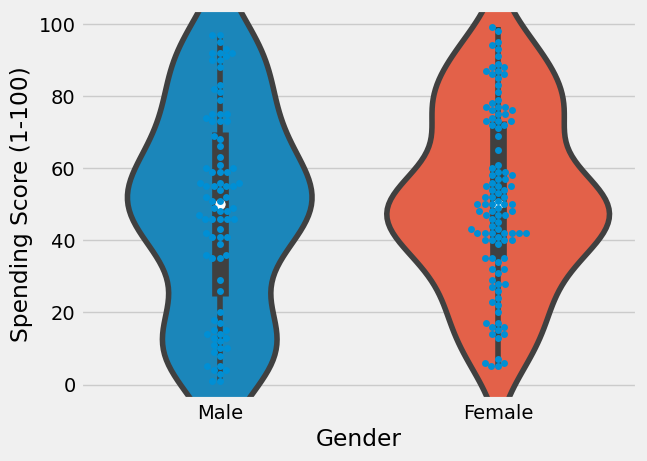

In [17]:
sns.violinplot(x="Gender", y="Spending Score (1-100)", data=df)
sns.swarmplot(x="Gender", y="Spending Score (1-100)", data=df)
plt.show()

In [18]:
features = ["Age", "Spending Score (1-100)"]

In [19]:
inertia_list = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", n_init=10, max_iter=300, random_state=42
    )
    kmeans.fit(df[features])
    inertia_list.append(kmeans.inertia_)

C:\Users\manojkumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manojkumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manojkumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\manojkumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a m

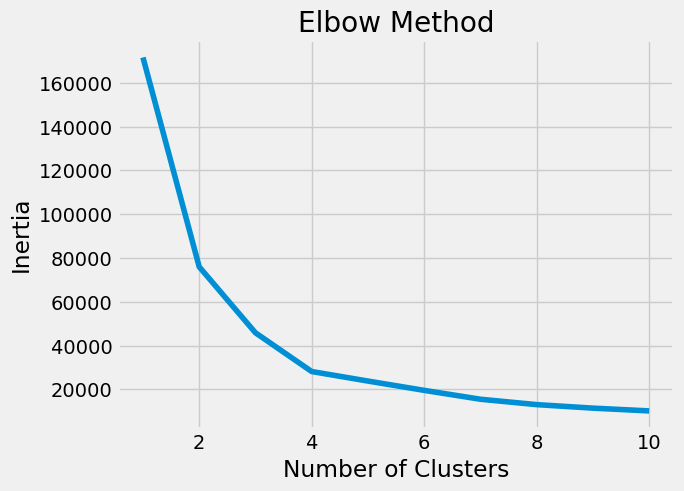

In [20]:
plt.plot(range(1, 11), inertia_list)
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [21]:
kmeans = KMeans(
    n_clusters=4, init="k-means++", n_init=10, max_iter=300, random_state=42
)

In [22]:
kmeans.fit(df[features])
labels1 = kmeans.labels_
centroids1 = kmeans.cluster_centers_

C:\Users\manojkumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


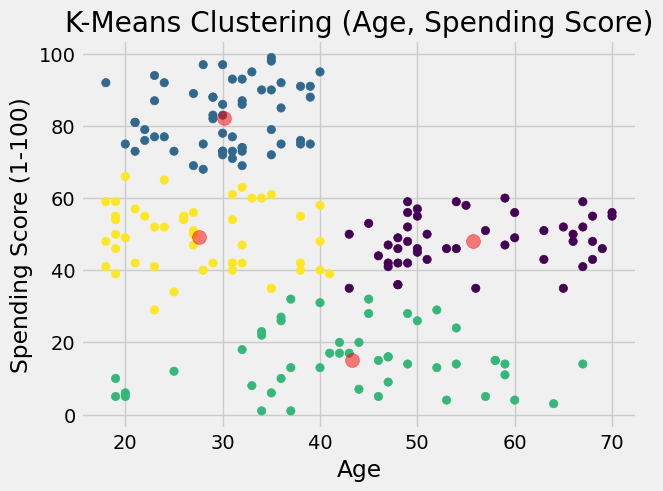

In [23]:
plt.scatter(df[features[0]], df[features[1]], c=labels1, cmap='viridis')
plt.scatter(centroids1[:, 0], centroids1[:, 1], c='red', s=100, alpha=0.5)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clustering (Age, Spending Score)")
plt.show()
